In [174]:
import xarray as xr
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import datetime
import pandas as pd

#OPEN FILES
ROOT = '/home1/ballycotton/DATA/PIRATE/SDL_INTERP/'
path = glob.glob(os.path.join(ROOT+'/2*/*.nc'))
OCC0=xr.open_mfdataset(path,decode_times=True,concat_dim='N_OBS')

In [92]:
#CALCULATE CALENDAR DATETIME
date_1 = datetime.datetime.strptime('01/01/1950', "%m/%d/%Y")
TITI=np.empty([0],dtype='datetime64')
for i in OCC0.N_OBS.values:
    TITI=np.append(TITI,np.datetime64(date_1 + datetime.timedelta(days=OCC0.JULD[i].values.item())))

In [178]:
#ADD SOME VARIABLES TO DATASET FOR PERIOD PLOTTING
OCC0['DATE']=xr.DataArray(TITI,dims='N_OBS')
OCC0['MONTH']=xr.DataArray(np.array(pd.DatetimeIndex(TITI).month),dims='N_OBS')
OCC0['YEAR']=xr.DataArray(np.array(pd.DatetimeIndex(TITI).year),dims='N_OBS')

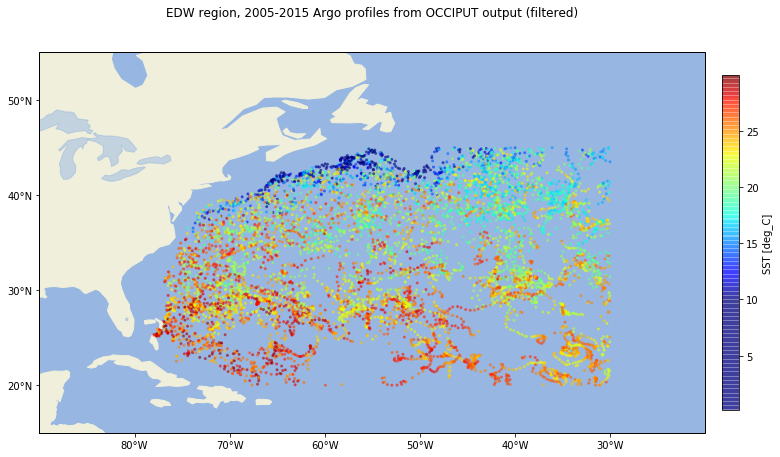

In [192]:
#CARTOPY
mproj=ccrs.PlateCarree()

OCC=OCC0.where((OCC0.YEAR<2010),drop=True)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1, projection=mproj)
ax.set_extent([-90, -20, 15, 55], crs=mproj)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks([-80,-70, -60, -50, -40, -30], crs=mproj)
ax.set_yticks([20, 30, 40, 50], crs=mproj)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cs=ax.scatter(OCC.LONGITUDE.values,OCC.LATITUDE.values,s=4,c=OCC.TEMP_OBS[:,0].values,alpha=0.5,cmap='jet')
cbar=fig.colorbar(cs,fraction=0.02,pad=0.02)
cbar.set_label('SST [deg_C]')
cbar.set_clim(10,30)
plt.title('EDW region, 2005-2015 Argo profiles from OCCIPUT output (filtered)\n \n')
plt.show()